# Prophet

In [7]:
import pandas as pd
from prophet import Prophet
import seaborn as sns; sns.set(style='darkgrid', palette='viridis')

In [8]:
df = pd.read_csv('./res/data/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


We fit the model by instantiating a new `Prophet` object. Any settings to the forecasting procedure are passed into the constructor. Then you call its `fit` method and pass in the historical dataframe.

In [9]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/opt/homebrew/Caskroom/miniforge/base/envs/lighthouse/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -19.4685
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        7976.8     0.0116281       1836.61           1           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7995.14    0.00107664       277.275      0.2356      0.2356      249   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7998.06    0.00084367       63.3809           1           1      386   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     356       7999.77    8.5129e-05       263.562   2.325e-07       0.001      492  LS failed, Hessian reset 
     399       8000.82   5.46984e-05       109.538      0.8049      0.8049      548   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       8002.78    0.00125019    

Predictions are then made on a dataframe with a column `ds` containing the dates for which a prediction is to be made. You can get a suitable dataframe that extends into the future a specified number of days using the helper method `Prophet.make_future_dataframe`. By default, it will also include the dates from the history, so we will see the model fit as well.

In [10]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


The `predict` method will assign each row in `future` a predicted value which it names `yhat`. If you pass in historical dates, it will provide an in-sample fit. The `forecast` object here is a new dataframe that includes a column `yhat` with the forecast, as well as columns for components and uncertainty intervals.

In [11]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

/opt/homebrew/Caskroom/miniforge/base/envs/lighthouse/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/Caskroom/miniforge/base/envs/lighthouse/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.205245,7.436493,8.968969
3266,2017-01-16,8.530266,7.769757,9.279845
3267,2017-01-17,8.317682,7.527139,9.101797
3268,2017-01-18,8.150288,7.412217,8.837084
3269,2017-01-19,8.162219,7.425603,8.833136


You can plot the forecast by calling the `Prophet.plot` method and passing in your forecast dataframe.

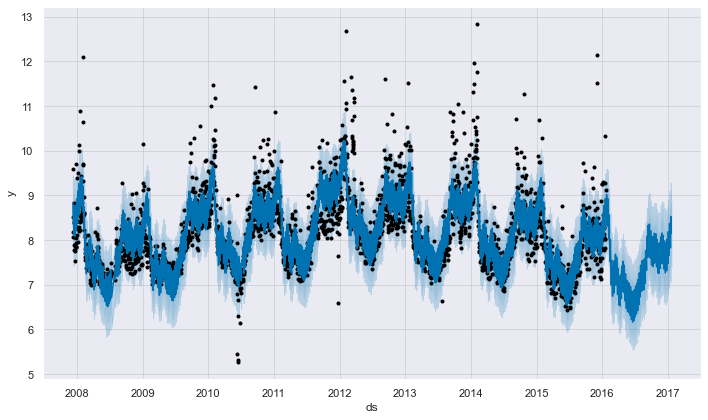

In [12]:
fig1 = m.plot(forecast)

If you want to see the forecast components, you can use the `Prophet.plot_components` method. By default, you'll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays, you'll see those here, too.

/opt/homebrew/Caskroom/miniforge/base/envs/lighthouse/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/Caskroom/miniforge/base/envs/lighthouse/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


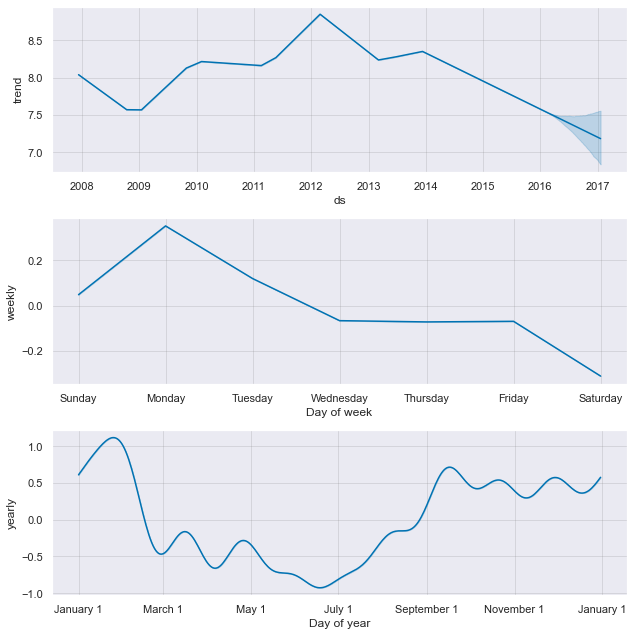

In [13]:
fig2 = m.plot_components(forecast)

An interactive figure of the forecast and components can be created with `plotly`, along with `notebook` and `ipywidgets` packages.

In [14]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [15]:
plot_components_plotly(m, forecast)

/opt/homebrew/Caskroom/miniforge/base/envs/lighthouse/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/envs/lighthouse/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



More details about the options available for each method are available in the docstrings via `help(Prophet)` or `help(Prophet.fit)`.